In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [71]:
df = pd.read_csv('fifa19\data.csv')

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City


In [74]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


# Data Cleaning

In [77]:
df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

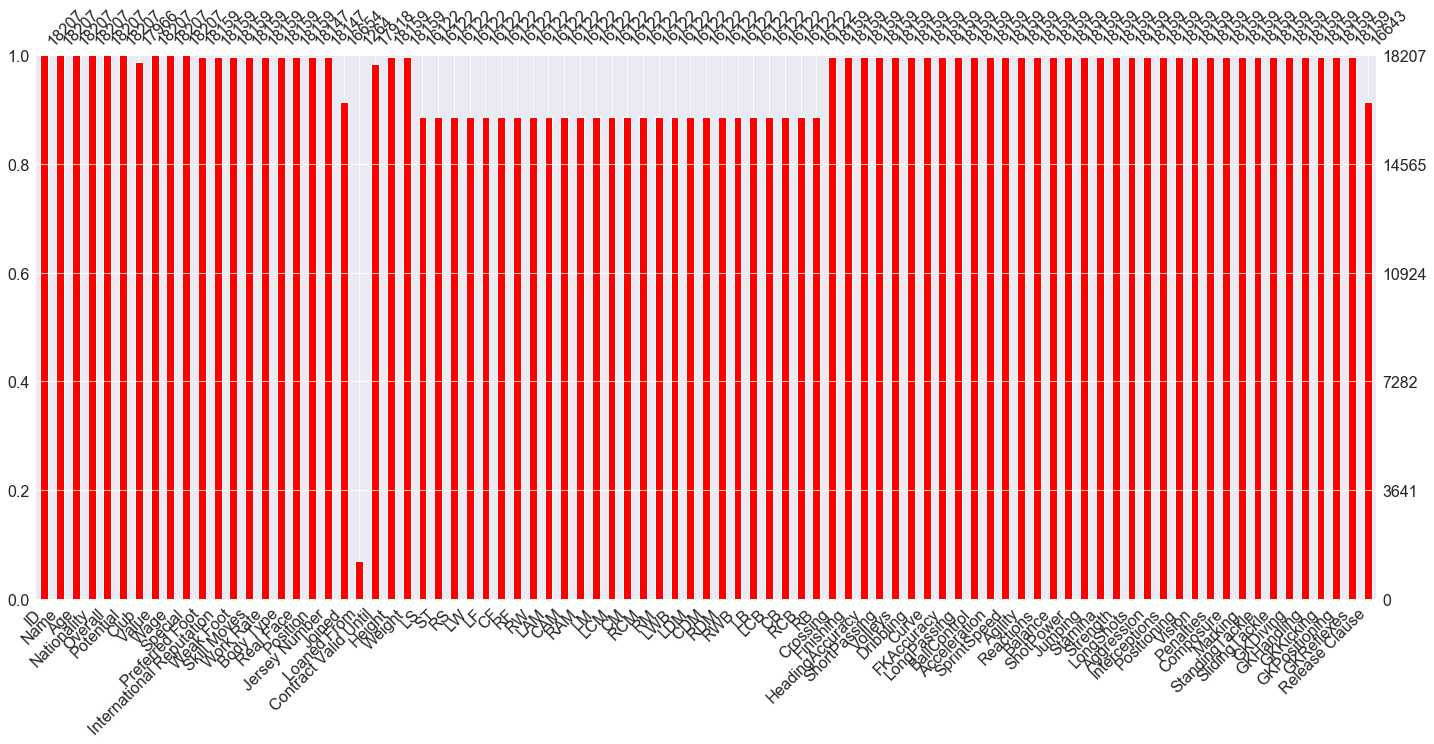

In [78]:
msno.bar(df.sample( 18207 ),color='red', labels=True)

In [79]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

In [80]:
missing_height = df[df['Height'].isnull()].index.tolist()

In [81]:
missing_height

[13236,
 13237,
 13238,
 13239,
 13240,
 13241,
 13242,
 13243,
 13244,
 13245,
 13246,
 13247,
 13248,
 13249,
 13250,
 13251,
 13252,
 13253,
 13254,
 13255,
 13256,
 13257,
 13258,
 13259,
 13260,
 13261,
 13262,
 13263,
 13264,
 13265,
 13266,
 13267,
 13268,
 13269,
 13270,
 13271,
 13272,
 13273,
 13274,
 13275,
 13276,
 13277,
 13278,
 13279,
 13280,
 13281,
 13282,
 13283]

In [87]:
df.drop(df.index[missing_height],inplace =True)

In [88]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1502
Loaned From                 16850
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2033
ST                           2033
RS                           2033
LW                           2033
LF                           2033
CF            

In [89]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

# Data Analysis

### Number of unique countries

In [92]:
print('Total number of countries : {}'.format(df['Nationality'].nunique()))

Total number of countries : 164


In [99]:
df['Nationality'].value_counts().sort_values(ascending = False)

England                 1652
Germany                 1192
Spain                   1069
Argentina                935
France                   907
Brazil                   825
Italy                    697
Colombia                 612
Japan                    476
Netherlands              451
Sweden                   395
China PR                 389
Chile                    388
Republic of Ireland      368
Mexico                   363
United States            352
Poland                   346
Norway                   341
Saudi Arabia             334
Denmark                  332
Korea Republic           329
Portugal                 322
Turkey                   303
Austria                  295
Scotland                 281
Belgium                  259
Australia                235
Switzerland              219
Uruguay                  149
Senegal                  130
Wales                    129
Croatia                  126
Serbia                   126
Nigeria                  121
Ghana         

###### Looks like European countries have the most number of players

### Number of unique clubs

In [101]:
print('Total number of clubs : {}'.format(df['Club'].nunique()))

Total number of clubs : 651


### Number of players on each Team - sorted in Descending order

In [102]:
df['Club'].value_counts().sort_values(ascending = False)

Southampton                            33
RC Celta                               33
Atlético Madrid                        33
FC Barcelona                           33
Valencia CF                            33
TSG 1899 Hoffenheim                    33
Empoli                                 33
Rayo Vallecano                         33
Manchester City                        33
Burnley                                33
Fortuna Düsseldorf                     33
Chelsea                                33
Wolverhampton Wanderers                33
Newcastle United                       33
Arsenal                                33
Borussia Dortmund                      33
Tottenham Hotspur                      33
Real Madrid                            33
Cardiff City                           33
Liverpool                              33
Frosinone                              33
CD Leganés                             33
Eintracht Frankfurt                    33
Manchester United                 

# Finding out best attributes of players in the game

In [129]:
print("Player with most potential: {}" .format(df.iloc[df['Potential'].idxmax()][1]))

Player with most potential: K. Mbappé


In [130]:
print("Player with most overall: {}" .format(df.iloc[df['Overall'].idxmax()][1]))

Player with most overall: L. Messi


In [135]:
football_attr = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy',
                 'LongPassing', 'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance','ShotPower', 
                 'Jumping', 'Stamina', 'Strength', 'LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision',
                 'Penalties','Composure', 'Marking', 'StandingTackle',
                 'SlidingTackle', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
for i in football_attr:
    print('Player with best {0}: {1}'.format(i, df.iloc[df[i].idxmax()][1]))

Player with best Crossing: K. De Bruyne
Player with best Finishing: L. Messi
Player with best HeadingAccuracy: Naldo
Player with best ShortPassing: L. Modrić
Player with best Volleys: E. Cavani
Player with best Dribbling: L. Messi
Player with best Curve: Quaresma
Player with best FKAccuracy: L. Messi
Player with best LongPassing: T. Kroos
Player with best BallControl: L. Messi
Player with best Acceleration: Douglas Costa
Player with best SprintSpeed: K. Mbappé
Player with best Agility: Neymar Jr
Player with best Reactions: Cristiano Ronaldo
Player with best Balance: Bernard
Player with best ShotPower: Cristiano Ronaldo
Player with best Jumping: Cristiano Ronaldo
Player with best Stamina: N. Kanté
Player with best Strength: A. Akinfenwa
Player with best LongShots: L. Messi
Player with best Aggression: B. Pearson
Player with best Interceptions: N. Kanté
Player with best Positioning: Cristiano Ronaldo
Player with best Vision: L. Messi
Player with best Penalties: M. Balotelli
Player with b

In [144]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

TypeError: 'float' object is not subscriptable

# Finding out most valued and highest earner in the game

In [146]:
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))

Most valued player : Neymar Jr
Highest earner : L. Messi


# Visual representations of various aspects of the game

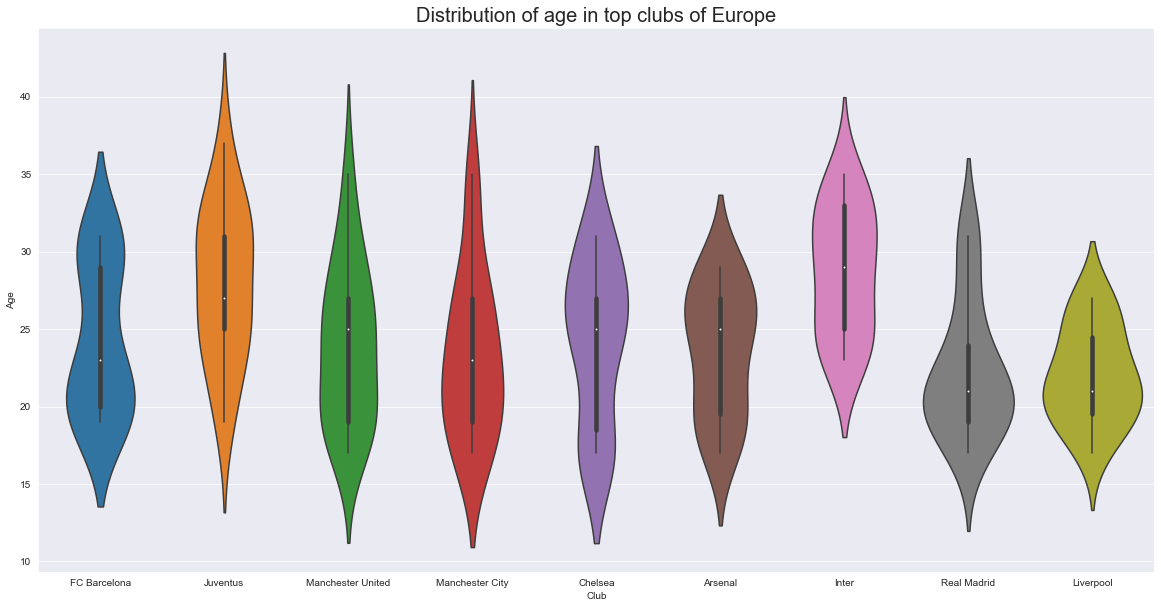

In [172]:
some_clubs = ('Juventus', 'Real Madrid', 'Inter', 'FC Barcelona', 'Chelsea', 'Manchester United', 
              'Liverpool', 'Arsenal', 'Manchester City')
df_club_1 = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club_1);
ax.set_title(label='Distribution of age in top clubs of Europe', fontsize=20);

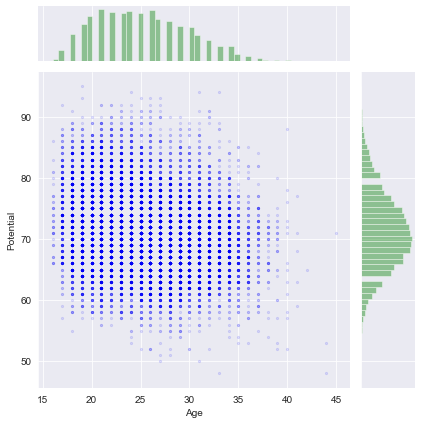

In [169]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'green'})

###### As players grow older their potential starts decreasing